In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [4]:
os.getcwd()

'C:\\Users\\User'

In [5]:
os.chdir('C:\\Users\\User\\Downloads\\csv_modified\\csv_modified\\1.5')

In [6]:
TSR15_3D_probe1 = pd.read_csv('probe1.csv')
TSR15_3D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR15_3D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR15_3D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR15_3D_probe5 = pd.read_csv('probe5.csv', header=None)

In [7]:
os.chdir('C:\\Users\\User\\Downloads\\csv_modified\\csv_modified\\1.6')

In [8]:
TSR16_3D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR16_3D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR16_3D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR16_3D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR16_3D_probe5 = pd.read_csv('probe5.csv', header=None)

In [9]:
os.chdir('C:\\Users\\User\\Downloads\\csv_modified\\csv_modified\\1.7')

In [10]:
TSR17_3D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR17_3D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR17_3D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR17_3D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR17_3D_probe5 = pd.read_csv('probe5.csv', header=None)

In [11]:
os.chdir('C:\\Users\\User\\Downloads\\csv_modified\\csv_modified\\1.8')

In [12]:
TSR18_3D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR18_3D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR18_3D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR18_3D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR18_3D_probe5 = pd.read_csv('probe5.csv', header=None)

In [13]:
os.chdir('C:\\Users\\User\\Downloads\\csv_modified\\csv_modified\\1.9')

In [14]:
TSR19_3D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR19_3D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR19_3D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR19_3D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR19_3D_probe5 = pd.read_csv('probe5.csv', header=None)

In [15]:
os.chdir('C:\\Users\\User\\Downloads\\csv_modified\\csv_modified\\2')

In [16]:
TSR20_3D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR20_3D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR20_3D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR20_3D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR20_3D_probe5 = pd.read_csv('probe5.csv', header=None)

In [17]:
os.chdir('C:\\Users\\User\\Downloads\\probe_2D\\probe_2D\\TSR1.5')

In [18]:
TSR15_2D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR15_2D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR15_2D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR15_2D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR15_2D_probe5 = pd.read_csv('probe5.csv', header=None)

In [19]:
os.chdir('C:\\Users\\User\\Downloads\\probe_2D\\probe_2D\\TSR1.6')

In [20]:
TSR16_2D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR16_2D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR16_2D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR16_2D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR16_2D_probe5 = pd.read_csv('probe5.csv', header=None)

In [21]:
os.chdir('C:\\Users\\User\\Downloads\\probe_2D\\probe_2D\\TSR1.7')

In [22]:
TSR17_2D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR17_2D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR17_2D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR17_2D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR17_2D_probe5 = pd.read_csv('probe5.csv', header=None)

In [23]:
os.chdir('C:\\Users\\User\\Downloads\\probe_2D\\probe_2D\\TSR1.8')

In [24]:
TSR18_2D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR18_2D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR18_2D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR18_2D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR18_2D_probe5 = pd.read_csv('probe5.csv', header=None)

In [25]:
os.chdir('C:\\Users\\User\\Downloads\\probe_2D\\probe_2D\\TSR1.9')

In [26]:
TSR19_2D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR19_2D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR19_2D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR19_2D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR19_2D_probe5 = pd.read_csv('probe5.csv', header=None)

In [27]:
os.chdir('C:\\Users\\User\\Downloads\\probe_2D\\probe_2D\\TSR2.0')

In [28]:
TSR20_2D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR20_2D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR20_2D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR20_2D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR20_2D_probe5 = pd.read_csv('probe5.csv', header=None)

In [29]:
os.chdir('C:\\Users\\User\\Downloads\\probe_2.5D\\probe_2.5D\\TSR1.5')

In [30]:
TSR15_2_5D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR15_2_5D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR15_2_5D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR15_2_5D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR15_2_5D_probe5 = pd.read_csv('probe5.csv', header=None)

In [31]:
os.chdir('C:\\Users\\User\\Downloads\\probe_2.5D\\probe_2.5D\\TSR1.6')

In [32]:
TSR16_2_5D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR16_2_5D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR16_2_5D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR16_2_5D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR16_2_5D_probe5 = pd.read_csv('probe5.csv', header=None)

In [33]:
os.chdir('C:\\Users\\User\\Downloads\\probe_2.5D\\probe_2.5D\\TSR1.7')

In [34]:
TSR17_2_5D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR17_2_5D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR17_2_5D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR17_2_5D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR17_2_5D_probe5 = pd.read_csv('probe5.csv', header=None)

In [35]:
os.chdir('C:\\Users\\User\\Downloads\\probe_2.5D\\probe_2.5D\\TSR1.8')

In [36]:
TSR18_2_5D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR18_2_5D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR18_2_5D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR18_2_5D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR18_2_5D_probe5 = pd.read_csv('probe5.csv', header=None)

In [37]:
os.chdir('C:\\Users\\User\\Downloads\\probe_2.5D\\probe_2.5D\\TSR1.9')

In [38]:
TSR19_2_5D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR19_2_5D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR19_2_5D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR19_2_5D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR19_2_5D_probe5 = pd.read_csv('probe5.csv', header=None)

In [39]:
os.chdir('C:\\Users\\User\\Downloads\\probe_2.5D\\probe_2.5D\\TSR2')

In [40]:
TSR20_2_5D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR20_2_5D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR20_2_5D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR20_2_5D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR20_2_5D_probe5 = pd.read_csv('probe5.csv', header=None)

In [41]:
os.chdir('C:\\Users\\User')

In [42]:
TSR15_2D_probe1 = TSR15_2D_probe1.to_numpy(dtype='float32')
TSR15_2D_probe2 = TSR15_2D_probe2.to_numpy(dtype='float32')
TSR15_2D_probe3 = TSR15_2D_probe3.to_numpy(dtype='float32')
TSR15_2D_probe4 = TSR15_2D_probe4.to_numpy(dtype='float32')
TSR15_2D_probe5 = TSR15_2D_probe5.to_numpy(dtype='float32')
TSR16_2D_probe1 = TSR16_2D_probe1.to_numpy(dtype='float32')
TSR16_2D_probe2 = TSR16_2D_probe2.to_numpy(dtype='float32')
TSR16_2D_probe3 = TSR16_2D_probe3.to_numpy(dtype='float32')
TSR16_2D_probe4 = TSR16_2D_probe4.to_numpy(dtype='float32')
TSR16_2D_probe5 = TSR16_2D_probe5.to_numpy(dtype='float32')
TSR17_2D_probe1 = TSR17_2D_probe1.to_numpy(dtype='float32')
TSR17_2D_probe2 = TSR17_2D_probe2.to_numpy(dtype='float32')
TSR17_2D_probe3 = TSR17_2D_probe3.to_numpy(dtype='float32')
TSR17_2D_probe4 = TSR17_2D_probe4.to_numpy(dtype='float32')
TSR17_2D_probe5 = TSR17_2D_probe5.to_numpy(dtype='float32')
TSR18_2D_probe1 = TSR18_2D_probe1.to_numpy(dtype='float32')
TSR18_2D_probe2 = TSR18_2D_probe2.to_numpy(dtype='float32')
TSR18_2D_probe3 = TSR18_2D_probe3.to_numpy(dtype='float32')
TSR18_2D_probe4 = TSR18_2D_probe4.to_numpy(dtype='float32')
TSR18_2D_probe5 = TSR18_2D_probe5.to_numpy(dtype='float32')
TSR19_2D_probe1 = TSR19_2D_probe1.to_numpy(dtype='float32')
TSR19_2D_probe2 = TSR19_2D_probe2.to_numpy(dtype='float32')
TSR19_2D_probe3 = TSR19_2D_probe3.to_numpy(dtype='float32')
TSR19_2D_probe4 = TSR19_2D_probe4.to_numpy(dtype='float32')
TSR19_2D_probe5 = TSR19_2D_probe5.to_numpy(dtype='float32')
TSR20_2D_probe1 = TSR20_2D_probe1.to_numpy(dtype='float32')
TSR20_2D_probe2 = TSR20_2D_probe2.to_numpy(dtype='float32')
TSR20_2D_probe3 = TSR20_2D_probe3.to_numpy(dtype='float32')
TSR20_2D_probe4 = TSR20_2D_probe4.to_numpy(dtype='float32')
TSR20_2D_probe5 = TSR20_2D_probe5.to_numpy(dtype='float32')

In [43]:
TSR15_2_5D_probe1 = TSR15_2_5D_probe1.to_numpy(dtype='float32')
TSR15_2_5D_probe2 = TSR15_2_5D_probe2.to_numpy(dtype='float32')
TSR15_2_5D_probe3 = TSR15_2_5D_probe3.to_numpy(dtype='float32')
TSR15_2_5D_probe4 = TSR15_2_5D_probe4.to_numpy(dtype='float32')
TSR15_2_5D_probe5 = TSR15_2_5D_probe5.to_numpy(dtype='float32')
TSR16_2_5D_probe1 = TSR16_2_5D_probe1.to_numpy(dtype='float32')
TSR16_2_5D_probe2 = TSR16_2_5D_probe2.to_numpy(dtype='float32')
TSR16_2_5D_probe3 = TSR16_2_5D_probe3.to_numpy(dtype='float32')
TSR16_2_5D_probe4 = TSR16_2_5D_probe4.to_numpy(dtype='float32')
TSR16_2_5D_probe5 = TSR16_2_5D_probe5.to_numpy(dtype='float32')
TSR17_2_5D_probe1 = TSR17_2_5D_probe1.to_numpy(dtype='float32')
TSR17_2_5D_probe2 = TSR17_2_5D_probe2.to_numpy(dtype='float32')
TSR17_2_5D_probe3 = TSR17_2_5D_probe3.to_numpy(dtype='float32')
TSR17_2_5D_probe4 = TSR17_2_5D_probe4.to_numpy(dtype='float32')
TSR17_2_5D_probe5 = TSR17_2_5D_probe5.to_numpy(dtype='float32')
TSR18_2_5D_probe1 = TSR18_2_5D_probe1.to_numpy(dtype='float32')
TSR18_2_5D_probe2 = TSR18_2_5D_probe2.to_numpy(dtype='float32')
TSR18_2_5D_probe3 = TSR18_2_5D_probe3.to_numpy(dtype='float32')
TSR18_2_5D_probe4 = TSR18_2_5D_probe4.to_numpy(dtype='float32')
TSR18_2_5D_probe5 = TSR18_2_5D_probe5.to_numpy(dtype='float32')
TSR19_2_5D_probe1 = TSR19_2_5D_probe1.to_numpy(dtype='float32')
TSR19_2_5D_probe2 = TSR19_2_5D_probe2.to_numpy(dtype='float32')
TSR19_2_5D_probe3 = TSR19_2_5D_probe3.to_numpy(dtype='float32')
TSR19_2_5D_probe4 = TSR19_2_5D_probe4.to_numpy(dtype='float32')
TSR19_2_5D_probe5 = TSR19_2_5D_probe5.to_numpy(dtype='float32')
TSR20_2_5D_probe1 = TSR20_2_5D_probe1.to_numpy(dtype='float32')
TSR20_2_5D_probe2 = TSR20_2_5D_probe2.to_numpy(dtype='float32')
TSR20_2_5D_probe3 = TSR20_2_5D_probe3.to_numpy(dtype='float32')
TSR20_2_5D_probe4 = TSR20_2_5D_probe4.to_numpy(dtype='float32')
TSR20_2_5D_probe5 = TSR20_2_5D_probe5.to_numpy(dtype='float32')

In [44]:
TSR15_3D_probe1 = TSR15_3D_probe1.to_numpy(dtype='float32')
TSR15_3D_probe2 = TSR15_3D_probe2.to_numpy(dtype='float32')
TSR15_3D_probe3 = TSR15_3D_probe3.to_numpy(dtype='float32')
TSR15_3D_probe4 = TSR15_3D_probe4.to_numpy(dtype='float32')
TSR15_3D_probe5 = TSR15_3D_probe5.to_numpy(dtype='float32')
TSR16_3D_probe1 = TSR16_3D_probe1.to_numpy(dtype='float32')
TSR16_3D_probe2 = TSR16_3D_probe2.to_numpy(dtype='float32')
TSR16_3D_probe3 = TSR16_3D_probe3.to_numpy(dtype='float32')
TSR16_3D_probe4 = TSR16_3D_probe4.to_numpy(dtype='float32')
TSR16_3D_probe5 = TSR16_3D_probe5.to_numpy(dtype='float32')
TSR17_3D_probe1 = TSR17_3D_probe1.to_numpy(dtype='float32')
TSR17_3D_probe2 = TSR17_3D_probe2.to_numpy(dtype='float32')
TSR17_3D_probe3 = TSR17_3D_probe3.to_numpy(dtype='float32')
TSR17_3D_probe4 = TSR17_3D_probe4.to_numpy(dtype='float32')
TSR17_3D_probe5 = TSR17_3D_probe5.to_numpy(dtype='float32')
TSR18_3D_probe1 = TSR18_3D_probe1.to_numpy(dtype='float32')
TSR18_3D_probe2 = TSR18_3D_probe2.to_numpy(dtype='float32')
TSR18_3D_probe3 = TSR18_3D_probe3.to_numpy(dtype='float32')
TSR18_3D_probe4 = TSR18_3D_probe4.to_numpy(dtype='float32')
TSR18_3D_probe5 = TSR18_3D_probe5.to_numpy(dtype='float32')
TSR19_3D_probe1 = TSR19_3D_probe1.to_numpy(dtype='float32')
TSR19_3D_probe2 = TSR19_3D_probe2.to_numpy(dtype='float32')
TSR19_3D_probe3 = TSR19_3D_probe3.to_numpy(dtype='float32')
TSR19_3D_probe4 = TSR19_3D_probe4.to_numpy(dtype='float32')
TSR19_3D_probe5 = TSR19_3D_probe5.to_numpy(dtype='float32')
TSR20_3D_probe1 = TSR20_3D_probe1.to_numpy(dtype='float32')
TSR20_3D_probe2 = TSR20_3D_probe2.to_numpy(dtype='float32')
TSR20_3D_probe3 = TSR20_3D_probe3.to_numpy(dtype='float32')
TSR20_3D_probe4 = TSR20_3D_probe4.to_numpy(dtype='float32')
TSR20_3D_probe5 = TSR20_3D_probe5.to_numpy(dtype='float32')

In [45]:
x15_2D_probe1 = TSR15_2D_probe1[:, 4]
x15_2D_probe2 = TSR15_2D_probe2[:, 4]
x15_2D_probe3 = TSR15_2D_probe3[:, 4]
x15_2D_probe4 = TSR15_2D_probe4[:, 4]
x15_2D_probe5 = TSR15_2D_probe5[:, 4]
x16_2D_probe1 = TSR16_2D_probe1[:, 4]
x16_2D_probe2 = TSR16_2D_probe2[:, 4]
x16_2D_probe3 = TSR16_2D_probe3[:, 4]
x16_2D_probe4 = TSR16_2D_probe4[:, 4]
x16_2D_probe5 = TSR16_2D_probe5[:, 4]
x17_2D_probe1 = TSR17_2D_probe1[:, 4]
x17_2D_probe2 = TSR17_2D_probe2[:, 4]
x17_2D_probe3 = TSR17_2D_probe3[:, 4]
x17_2D_probe4 = TSR17_2D_probe4[:, 4]
x17_2D_probe5 = TSR17_2D_probe5[:, 4]
x18_2D_probe1 = TSR18_2D_probe1[:, 4]
x18_2D_probe2 = TSR18_2D_probe2[:, 4]
x18_2D_probe3 = TSR18_2D_probe3[:, 4]
x18_2D_probe4 = TSR18_2D_probe4[:, 4]
x18_2D_probe5 = TSR18_2D_probe5[:, 4]
x19_2D_probe1 = TSR19_2D_probe1[:, 4]
x19_2D_probe2 = TSR19_2D_probe2[:, 4]
x19_2D_probe3 = TSR19_2D_probe3[:, 4]
x19_2D_probe4 = TSR19_2D_probe4[:, 4]
x19_2D_probe5 = TSR19_2D_probe5[:, 4]
x20_2D_probe1 = TSR20_2D_probe1[:, 4]
x20_2D_probe2 = TSR20_2D_probe2[:, 4]
x20_2D_probe3 = TSR20_2D_probe3[:, 4]
x20_2D_probe4 = TSR20_2D_probe4[:, 4]
x20_2D_probe5 = TSR20_2D_probe5[:, 4]

In [46]:
x15_2_5D_probe1 = TSR15_2_5D_probe1[:, 4]
x15_2_5D_probe2 = TSR15_2_5D_probe2[:, 4]
x15_2_5D_probe3 = TSR15_2_5D_probe3[:, 4]
x15_2_5D_probe4 = TSR15_2_5D_probe4[:, 4]
x15_2_5D_probe5 = TSR15_2_5D_probe5[:, 4]
x16_2_5D_probe1 = TSR16_2_5D_probe1[:, 4]
x16_2_5D_probe2 = TSR16_2_5D_probe2[:, 4]
x16_2_5D_probe3 = TSR16_2_5D_probe3[:, 4]
x16_2_5D_probe4 = TSR16_2_5D_probe4[:, 4]
x16_2_5D_probe5 = TSR16_2_5D_probe5[:, 4]
x17_2_5D_probe1 = TSR17_2_5D_probe1[:, 4]
x17_2_5D_probe2 = TSR17_2_5D_probe2[:, 4]
x17_2_5D_probe3 = TSR17_2_5D_probe3[:, 4]
x17_2_5D_probe4 = TSR17_2_5D_probe4[:, 4]
x17_2_5D_probe5 = TSR17_2_5D_probe5[:, 4]
x18_2_5D_probe1 = TSR18_2_5D_probe1[:, 4]
x18_2_5D_probe2 = TSR18_2_5D_probe2[:, 4]
x18_2_5D_probe3 = TSR18_2_5D_probe3[:, 4]
x18_2_5D_probe4 = TSR18_2_5D_probe4[:, 4]
x18_2_5D_probe5 = TSR18_2_5D_probe5[:, 4]
x19_2_5D_probe1 = TSR19_2_5D_probe1[:, 4]
x19_2_5D_probe2 = TSR19_2_5D_probe2[:, 4]
x19_2_5D_probe3 = TSR19_2_5D_probe3[:, 4]
x19_2_5D_probe4 = TSR19_2_5D_probe4[:, 4]
x19_2_5D_probe5 = TSR19_2_5D_probe5[:, 4]
x20_2_5D_probe1 = TSR20_2_5D_probe1[:, 4]
x20_2_5D_probe2 = TSR20_2_5D_probe2[:, 4]
x20_2_5D_probe3 = TSR20_2_5D_probe3[:, 4]
x20_2_5D_probe4 = TSR20_2_5D_probe4[:, 4]
x20_2_5D_probe5 = TSR20_2_5D_probe5[:, 4]

In [47]:
x15_3D_probe1 = TSR15_3D_probe1[:, 4]
x15_3D_probe2 = TSR15_3D_probe2[:, 4]
x15_3D_probe3 = TSR15_3D_probe3[:, 4]
x15_3D_probe4 = TSR15_3D_probe4[:, 4]
x15_3D_probe5 = TSR15_3D_probe5[:, 4]
x16_3D_probe1 = TSR16_3D_probe1[:, 4]
x16_3D_probe2 = TSR16_3D_probe2[:, 4]
x16_3D_probe3 = TSR16_3D_probe3[:, 4]
x16_3D_probe4 = TSR16_3D_probe4[:, 4]
x16_3D_probe5 = TSR16_3D_probe5[:, 4]
x17_3D_probe1 = TSR17_3D_probe1[:, 4]
x17_3D_probe2 = TSR17_3D_probe2[:, 4]
x17_3D_probe3 = TSR17_3D_probe3[:, 4]
x17_3D_probe4 = TSR17_3D_probe4[:, 4]
x17_3D_probe5 = TSR17_3D_probe5[:, 4]
x18_3D_probe1 = TSR18_3D_probe1[:, 4]
x18_3D_probe2 = TSR18_3D_probe2[:, 4]
x18_3D_probe3 = TSR18_3D_probe3[:, 4]
x18_3D_probe4 = TSR18_3D_probe4[:, 4]
x18_3D_probe5 = TSR18_3D_probe5[:, 4]
x19_3D_probe1 = TSR19_3D_probe1[:, 4]
x19_3D_probe2 = TSR19_3D_probe2[:, 4]
x19_3D_probe3 = TSR19_3D_probe3[:, 4]
x19_3D_probe4 = TSR19_3D_probe4[:, 4]
x19_3D_probe5 = TSR19_3D_probe5[:, 4]
x20_3D_probe1 = TSR20_3D_probe1[:, 4]
x20_3D_probe2 = TSR20_3D_probe2[:, 4]
x20_3D_probe3 = TSR20_3D_probe3[:, 4]
x20_3D_probe4 = TSR20_3D_probe4[:, 4]
x20_3D_probe5 = TSR20_3D_probe5[:, 4]

In [48]:
x15_2D_probe1 = x15_2D_probe1.reshape((37, 1))
x15_2D_probe2 = x15_2D_probe2.reshape((37, 1))
x15_2D_probe3 = x15_2D_probe3.reshape((37, 1))
x15_2D_probe4 = x15_2D_probe4.reshape((37, 1))
x15_2D_probe5 = x15_2D_probe5.reshape((37, 1))
x16_2D_probe1 = x16_2D_probe1.reshape((37, 1))
x16_2D_probe2 = x16_2D_probe2.reshape((37, 1))
x16_2D_probe3 = x16_2D_probe3.reshape((37, 1))
x16_2D_probe4 = x16_2D_probe4.reshape((37, 1))
x16_2D_probe5 = x16_2D_probe5.reshape((37, 1))
x17_2D_probe1 = x17_2D_probe1.reshape((37, 1))
x17_2D_probe2 = x17_2D_probe2.reshape((37, 1))
x17_2D_probe3 = x17_2D_probe3.reshape((37, 1))
x17_2D_probe4 = x17_2D_probe4.reshape((37, 1))
x17_2D_probe5 = x17_2D_probe5.reshape((37, 1))
x18_2D_probe1 = x18_2D_probe1.reshape((37, 1))
x18_2D_probe2 = x18_2D_probe2.reshape((37, 1))
x18_2D_probe3 = x18_2D_probe3.reshape((37, 1))
x18_2D_probe4 = x18_2D_probe4.reshape((37, 1))
x18_2D_probe5 = x18_2D_probe5.reshape((37, 1))
x19_2D_probe1 = x19_2D_probe1.reshape((37, 1))
x19_2D_probe2 = x19_2D_probe2.reshape((37, 1))
x19_2D_probe3 = x19_2D_probe3.reshape((37, 1))
x19_2D_probe4 = x19_2D_probe4.reshape((37, 1))
x19_2D_probe5 = x19_2D_probe5.reshape((37, 1))
x20_2D_probe1 = x20_2D_probe1.reshape((37, 1))
x20_2D_probe2 = x20_2D_probe2.reshape((37, 1))
x20_2D_probe3 = x20_2D_probe3.reshape((37, 1))
x20_2D_probe4 = x20_2D_probe4.reshape((37, 1))
x20_2D_probe5 = x20_2D_probe5.reshape((37, 1))

In [49]:
x15_2_5D_probe1 = x15_2_5D_probe1.reshape((37, 1))
x15_2_5D_probe2 = x15_2_5D_probe2.reshape((37, 1))
x15_2_5D_probe3 = x15_2_5D_probe3.reshape((37, 1))
x15_2_5D_probe4 = x15_2_5D_probe4.reshape((37, 1))
x15_2_5D_probe5 = x15_2_5D_probe5.reshape((37, 1))
x16_2_5D_probe1 = x16_2_5D_probe1.reshape((37, 1))
x16_2_5D_probe2 = x16_2_5D_probe2.reshape((37, 1))
x16_2_5D_probe3 = x16_2_5D_probe3.reshape((37, 1))
x16_2_5D_probe4 = x16_2_5D_probe4.reshape((37, 1))
x16_2_5D_probe5 = x16_2_5D_probe5.reshape((37, 1))
x17_2_5D_probe1 = x17_2_5D_probe1.reshape((37, 1))
x17_2_5D_probe2 = x17_2_5D_probe2.reshape((37, 1))
x17_2_5D_probe3 = x17_2_5D_probe3.reshape((37, 1))
x17_2_5D_probe4 = x17_2_5D_probe4.reshape((37, 1))
x17_2_5D_probe5 = x17_2_5D_probe5.reshape((37, 1))
x18_2_5D_probe1 = x18_2_5D_probe1.reshape((37, 1))
x18_2_5D_probe2 = x18_2_5D_probe2.reshape((37, 1))
x18_2_5D_probe3 = x18_2_5D_probe3.reshape((37, 1))
x18_2_5D_probe4 = x18_2_5D_probe4.reshape((37, 1))
x18_2_5D_probe5 = x18_2_5D_probe5.reshape((37, 1))
x19_2_5D_probe1 = x19_2_5D_probe1.reshape((37, 1))
x19_2_5D_probe2 = x19_2_5D_probe2.reshape((37, 1))
x19_2_5D_probe3 = x19_2_5D_probe3.reshape((37, 1))
x19_2_5D_probe4 = x19_2_5D_probe4.reshape((37, 1))
x19_2_5D_probe5 = x19_2_5D_probe5.reshape((37, 1))
x20_2_5D_probe1 = x20_2_5D_probe1.reshape((37, 1))
x20_2_5D_probe2 = x20_2_5D_probe2.reshape((37, 1))
x20_2_5D_probe3 = x20_2_5D_probe3.reshape((37, 1))
x20_2_5D_probe4 = x20_2_5D_probe4.reshape((37, 1))
x20_2_5D_probe5 = x20_2_5D_probe5.reshape((37, 1))

In [50]:
x15_3D_probe1 = x15_3D_probe1.reshape((37, 1))
x15_3D_probe2 = x15_3D_probe2.reshape((37, 1))
x15_3D_probe3 = x15_3D_probe3.reshape((37, 1))
x15_3D_probe4 = x15_3D_probe4.reshape((37, 1))
x15_3D_probe5 = x15_3D_probe5.reshape((37, 1))
x16_3D_probe1 = x16_3D_probe1.reshape((37, 1))
x16_3D_probe2 = x16_3D_probe2.reshape((37, 1))
x16_3D_probe3 = x16_3D_probe3.reshape((37, 1))
x16_3D_probe4 = x16_3D_probe4.reshape((37, 1))
x16_3D_probe5 = x16_3D_probe5.reshape((37, 1))
x17_3D_probe1 = x17_3D_probe1.reshape((37, 1))
x17_3D_probe2 = x17_3D_probe2.reshape((37, 1))
x17_3D_probe3 = x17_3D_probe3.reshape((37, 1))
x17_3D_probe4 = x17_3D_probe4.reshape((37, 1))
x17_3D_probe5 = x17_3D_probe5.reshape((37, 1))
x18_3D_probe1 = x18_3D_probe1.reshape((37, 1))
x18_3D_probe2 = x18_3D_probe2.reshape((37, 1))
x18_3D_probe3 = x18_3D_probe3.reshape((37, 1))
x18_3D_probe4 = x18_3D_probe4.reshape((37, 1))
x18_3D_probe5 = x18_3D_probe5.reshape((37, 1))
x19_3D_probe1 = x19_3D_probe1.reshape((37, 1))
x19_3D_probe2 = x19_3D_probe2.reshape((37, 1))
x19_3D_probe3 = x19_3D_probe3.reshape((37, 1))
x19_3D_probe4 = x19_3D_probe4.reshape((37, 1))
x19_3D_probe5 = x19_3D_probe5.reshape((37, 1))
x20_3D_probe1 = x20_3D_probe1.reshape((37, 1))
x20_3D_probe2 = x20_3D_probe2.reshape((37, 1))
x20_3D_probe3 = x20_3D_probe3.reshape((37, 1))
x20_3D_probe4 = x20_3D_probe4.reshape((37, 1))
x20_3D_probe5 = x20_3D_probe5.reshape((37, 1))

In [51]:
print(x20_3D_probe5.shape)

(37, 1)


In [52]:
x_train15 = np.hstack((x15_2D_probe1, x15_2D_probe2, x15_2D_probe3, x15_2D_probe4, x15_2D_probe5,
                       x15_2_5D_probe1, x15_2_5D_probe2, x15_2_5D_probe3, x15_2_5D_probe4, x15_2_5D_probe5,
                       x15_3D_probe1, x15_3D_probe2, x15_3D_probe3, x15_3D_probe4, x15_3D_probe5))
x_train16 = np.hstack((x16_2D_probe1, x16_2D_probe2, x16_2D_probe3, x16_2D_probe4, x16_2D_probe5,
                       x16_2_5D_probe1, x16_2_5D_probe2, x16_2_5D_probe3, x16_2_5D_probe4, x16_2_5D_probe5,
                       x16_3D_probe1, x16_3D_probe2, x16_3D_probe3, x16_3D_probe4, x16_3D_probe5))
x_train17 = np.hstack((x17_2D_probe1, x17_2D_probe2, x17_2D_probe3, x17_2D_probe4, x17_2D_probe5,
                       x17_2_5D_probe1, x17_2_5D_probe2, x17_2_5D_probe3, x17_2_5D_probe4, x17_2_5D_probe5,
                       x17_3D_probe1, x17_3D_probe2, x17_3D_probe3, x17_3D_probe4, x17_3D_probe5))
x_train18 = np.hstack((x18_2D_probe1, x18_2D_probe2, x18_2D_probe3, x18_2D_probe4, x18_2D_probe5,
                       x18_2_5D_probe1, x18_2_5D_probe2, x18_2_5D_probe3, x18_2_5D_probe4, x18_2_5D_probe5,
                       x18_3D_probe1, x18_3D_probe2, x18_3D_probe3, x18_3D_probe4, x18_3D_probe5))
x_train19 = np.hstack((x19_2D_probe1, x19_2D_probe2, x19_2D_probe3, x19_2D_probe4, x19_2D_probe5,
                       x19_2_5D_probe1, x19_2_5D_probe2, x19_2_5D_probe3, x19_2_5D_probe4, x19_2_5D_probe5,
                       x19_3D_probe1, x19_3D_probe2, x19_3D_probe3, x19_3D_probe4, x19_3D_probe5))
x_train20 = np.hstack((x20_2D_probe1, x20_2D_probe2, x20_2D_probe3, x20_2D_probe4, x20_2D_probe5,
                       x20_2_5D_probe1, x20_2_5D_probe2, x20_2_5D_probe3, x20_2_5D_probe4, x20_2_5D_probe5,
                       x20_3D_probe1, x20_3D_probe2, x20_3D_probe3, x20_3D_probe4, x20_3D_probe5))

In [53]:
x = np.vstack((x_train15, x_train16, x_train17, x_train18, x_train19, x_train20))

In [54]:
x = x.reshape(37*6, n_sensors, 1)

In [55]:
os.chdir('E:\\MLdataset\\vorticity_interpolation\\TSR1.5')

In [56]:
vor15_000 = pd.read_csv('1.5_4.9513_dimlessVor.csv', header=None)
vor15_010 = pd.read_csv('1.5_4.9580_dimlessVor.csv', header=None)
vor15_020 = pd.read_csv('1.5_4.9647_dimlessVor.csv', header=None)
vor15_030 = pd.read_csv('1.5_4.9714_dimlessVor.csv', header=None)
vor15_040 = pd.read_csv('1.5_4.9781_dimlessVor.csv', header=None)
vor15_050 = pd.read_csv('1.5_4.9848_dimlessVor.csv', header=None)
vor15_060 = pd.read_csv('1.5_4.9915_dimlessVor.csv', header=None)
vor15_070 = pd.read_csv('1.5_4.9982_dimlessVor.csv', header=None)
vor15_080 = pd.read_csv('1.5_5.0049_dimlessVor.csv', header=None)
vor15_090 = pd.read_csv('1.5_5.0116_dimlessVor.csv', header=None)
vor15_100 = pd.read_csv('1.5_5.0183_dimlessVor.csv', header=None)
vor15_110 = pd.read_csv('1.5_5.0250_dimlessVor.csv', header=None)
vor15_120 = pd.read_csv('1.5_5.0317_dimlessVor.csv', header=None)
vor15_130 = pd.read_csv('1.5_5.0384_dimlessVor.csv', header=None)
vor15_140 = pd.read_csv('1.5_5.0451_dimlessVor.csv', header=None)
vor15_150 = pd.read_csv('1.5_5.0518_dimlessVor.csv', header=None)
vor15_160 = pd.read_csv('1.5_5.0585_dimlessVor.csv', header=None)
vor15_170 = pd.read_csv('1.5_5.0652_dimlessVor.csv', header=None)
vor15_180 = pd.read_csv('1.5_5.0719_dimlessVor.csv', header=None)
vor15_190 = pd.read_csv('1.5_5.0786_dimlessVor.csv', header=None)
vor15_200 = pd.read_csv('1.5_5.0853_dimlessVor.csv', header=None)
vor15_210 = pd.read_csv('1.5_5.0920_dimlessVor.csv', header=None)
vor15_220 = pd.read_csv('1.5_5.0987_dimlessVor.csv', header=None)
vor15_230 = pd.read_csv('1.5_5.1054_dimlessVor.csv', header=None)
vor15_240 = pd.read_csv('1.5_5.1121_dimlessVor.csv', header=None)
vor15_250 = pd.read_csv('1.5_5.1188_dimlessVor.csv', header=None)
vor15_260 = pd.read_csv('1.5_5.1255_dimlessVor.csv', header=None)
vor15_270 = pd.read_csv('1.5_5.1322_dimlessVor.csv', header=None)
vor15_280 = pd.read_csv('1.5_5.1389_dimlessVor.csv', header=None)
vor15_290 = pd.read_csv('1.5_5.1456_dimlessVor.csv', header=None)
vor15_300 = pd.read_csv('1.5_5.1523_dimlessVor.csv', header=None)
vor15_310 = pd.read_csv('1.5_5.1590_dimlessVor.csv', header=None)
vor15_320 = pd.read_csv('1.5_5.1657_dimlessVor.csv', header=None)
vor15_330 = pd.read_csv('1.5_5.1724_dimlessVor.csv', header=None)
vor15_340 = pd.read_csv('1.5_5.1791_dimlessVor.csv', header=None)
vor15_350 = pd.read_csv('1.5_5.1858_dimlessVor.csv', header=None)
vor15_360 = pd.read_csv('1.5_5.1925_dimlessVor.csv', header=None)

In [57]:
os.chdir('E:\\MLdataset\\vorticity_interpolation\\TSR1.6')

In [58]:
vor16_000 = pd.read_csv('1.6_4.943642_dimlessVor.csv', header=None)
vor16_010 = pd.read_csv('1.6_4.949884_dimlessVor.csv', header=None)
vor16_020 = pd.read_csv('1.6_4.956126_dimlessVor.csv', header=None)
vor16_030 = pd.read_csv('1.6_4.962368_dimlessVor.csv', header=None)
vor16_040 = pd.read_csv('1.6_4.968610_dimlessVor.csv', header=None)
vor16_050 = pd.read_csv('1.6_4.971731_dimlessVor.csv', header=None)
vor16_060 = pd.read_csv('1.6_4.977973_dimlessVor.csv', header=None)
vor16_070 = pd.read_csv('1.6_4.984215_dimlessVor.csv', header=None)
vor16_080 = pd.read_csv('1.6_4.990457_dimlessVor.csv', header=None)
vor16_090 = pd.read_csv('1.6_4.999820_dimlessVor.csv', header=None)
vor16_100 = pd.read_csv('1.6_5.006062_dimlessVor.csv', header=None)
vor16_110 = pd.read_csv('1.6_5.012304_dimlessVor.csv', header=None)
vor16_120 = pd.read_csv('1.6_5.018546_dimlessVor.csv', header=None)
vor16_130 = pd.read_csv('1.6_5.021667_dimlessVor.csv', header=None)
vor16_140 = pd.read_csv('1.6_5.027909_dimlessVor.csv', header=None)
vor16_150 = pd.read_csv('1.6_5.034151_dimlessVor.csv', header=None)
vor16_160 = pd.read_csv('1.6_5.040393_dimlessVor.csv', header=None)
vor16_170 = pd.read_csv('1.6_5.049756_dimlessVor.csv', header=None)
vor16_180 = pd.read_csv('1.6_5.055998_dimlessVor.csv', header=None)
vor16_190 = pd.read_csv('1.6_5.062240_dimlessVor.csv', header=None)
vor16_200 = pd.read_csv('1.6_5.068482_dimlessVor.csv', header=None)
vor16_210 = pd.read_csv('1.6_5.071603_dimlessVor.csv', header=None)
vor16_220 = pd.read_csv('1.6_5.077845_dimlessVor.csv', header=None)
vor16_230 = pd.read_csv('1.6_5.084087_dimlessVor.csv', header=None)
vor16_240 = pd.read_csv('1.6_5.090329_dimlessVor.csv', header=None)
vor16_250 = pd.read_csv('1.6_5.099692_dimlessVor.csv', header=None)
vor16_260 = pd.read_csv('1.6_5.105934_dimlessVor.csv', header=None)
vor16_270 = pd.read_csv('1.6_5.112176_dimlessVor.csv', header=None)
vor16_280 = pd.read_csv('1.6_5.118418_dimlessVor.csv', header=None)
vor16_290 = pd.read_csv('1.6_5.121539_dimlessVor.csv', header=None)
vor16_300 = pd.read_csv('1.6_5.127781_dimlessVor.csv', header=None)
vor16_310 = pd.read_csv('1.6_5.134023_dimlessVor.csv', header=None)
vor16_320 = pd.read_csv('1.6_5.140265_dimlessVor.csv', header=None)
vor16_330 = pd.read_csv('1.6_5.149628_dimlessVor.csv', header=None)
vor16_340 = pd.read_csv('1.6_5.155870_dimlessVor.csv', header=None)
vor16_350 = pd.read_csv('1.6_5.162112_dimlessVor.csv', header=None)
vor16_360 = pd.read_csv('1.6_5.168354_dimlessVor.csv', header=None)

In [59]:
os.chdir('E:\\MLdataset\\vorticity_interpolation\\TSR1.7')

In [60]:
vor17_000 = pd.read_csv('1.7_4.4415_dimlessVor.csv', header=None)
vor17_010 = pd.read_csv('1.7_4.4474_dimlessVor.csv', header=None)
vor17_020 = pd.read_csv('1.7_4.4533_dimlessVor.csv', header=None)
vor17_030 = pd.read_csv('1.7_4.4592_dimlessVor.csv', header=None)
vor17_040 = pd.read_csv('1.7_4.4651_dimlessVor.csv', header=None)
vor17_050 = pd.read_csv('1.7_4.4710_dimlessVor.csv', header=None)
vor17_060 = pd.read_csv('1.7_4.4769_dimlessVor.csv', header=None)
vor17_070 = pd.read_csv('1.7_4.4828_dimlessVor.csv', header=None)
vor17_080 = pd.read_csv('1.7_4.4887_dimlessVor.csv', header=None)
vor17_090 = pd.read_csv('1.7_4.4946_dimlessVor.csv', header=None)
vor17_100 = pd.read_csv('1.7_4.5005_dimlessVor.csv', header=None)
vor17_110 = pd.read_csv('1.7_4.5064_dimlessVor.csv', header=None)
vor17_120 = pd.read_csv('1.7_4.5123_dimlessVor.csv', header=None)
vor17_130 = pd.read_csv('1.7_4.5182_dimlessVor.csv', header=None)
vor17_140 = pd.read_csv('1.7_4.5241_dimlessVor.csv', header=None)
vor17_150 = pd.read_csv('1.7_4.5300_dimlessVor.csv', header=None)
vor17_160 = pd.read_csv('1.7_4.5359_dimlessVor.csv', header=None)
vor17_170 = pd.read_csv('1.7_4.5418_dimlessVor.csv', header=None)
vor17_180 = pd.read_csv('1.7_4.5477_dimlessVor.csv', header=None)
vor17_190 = pd.read_csv('1.7_4.5536_dimlessVor.csv', header=None)
vor17_200 = pd.read_csv('1.7_4.5595_dimlessVor.csv', header=None)
vor17_210 = pd.read_csv('1.7_4.5654_dimlessVor.csv', header=None)
vor17_220 = pd.read_csv('1.7_4.5713_dimlessVor.csv', header=None)
vor17_230 = pd.read_csv('1.7_4.5772_dimlessVor.csv', header=None)
vor17_240 = pd.read_csv('1.7_4.5831_dimlessVor.csv', header=None)
vor17_250 = pd.read_csv('1.7_4.5890_dimlessVor.csv', header=None)
vor17_260 = pd.read_csv('1.7_4.5949_dimlessVor.csv', header=None)
vor17_270 = pd.read_csv('1.7_4.6008_dimlessVor.csv', header=None)
vor17_280 = pd.read_csv('1.7_4.6067_dimlessVor.csv', header=None)
vor17_290 = pd.read_csv('1.7_4.6126_dimlessVor.csv', header=None)
vor17_300 = pd.read_csv('1.7_4.6185_dimlessVor.csv', header=None)
vor17_310 = pd.read_csv('1.7_4.6244_dimlessVor.csv', header=None)
vor17_320 = pd.read_csv('1.7_4.6303_dimlessVor.csv', header=None)
vor17_330 = pd.read_csv('1.7_4.6362_dimlessVor.csv', header=None)
vor17_340 = pd.read_csv('1.7_4.6421_dimlessVor.csv', header=None)
vor17_350 = pd.read_csv('1.7_4.6480_dimlessVor.csv', header=None)
vor17_360 = pd.read_csv('1.7_4.652846_dimlessVor.csv', header=None)

In [61]:
os.chdir('E:\\MLdataset\\vorticity_interpolation\\TSR1.8')

In [62]:
vor18_000 = pd.read_csv('1.8_4.394346_dimlessVor.csv', header=None)
vor18_010 = pd.read_csv('1.8_4.399894_dimlessVor.csv', header=None)
vor18_020 = pd.read_csv('1.8_4.405442_dimlessVor.csv', header=None)
vor18_030 = pd.read_csv('1.8_4.410990_dimlessVor.csv', header=None)
vor18_040 = pd.read_csv('1.8_4.416538_dimlessVor.csv', header=None)
vor18_050 = pd.read_csv('1.8_4.422086_dimlessVor.csv', header=None)
vor18_060 = pd.read_csv('1.8_4.427634_dimlessVor.csv', header=None)
vor18_070 = pd.read_csv('1.8_4.433182_dimlessVor.csv', header=None)
vor18_080 = pd.read_csv('1.8_4.438730_dimlessVor.csv', header=None)
vor18_090 = pd.read_csv('1.8_4.444278_dimlessVor.csv', header=None)
vor18_100 = pd.read_csv('1.8_4.449826_dimlessVor.csv', header=None)
vor18_110 = pd.read_csv('1.8_4.455374_dimlessVor.csv', header=None)
vor18_120 = pd.read_csv('1.8_4.460922_dimlessVor.csv', header=None)
vor18_130 = pd.read_csv('1.8_4.466470_dimlessVor.csv', header=None)
vor18_140 = pd.read_csv('1.8_4.472018_dimlessVor.csv', header=None)
vor18_150 = pd.read_csv('1.8_4.477566_dimlessVor.csv', header=None)
vor18_160 = pd.read_csv('1.8_4.483114_dimlessVor.csv', header=None)
vor18_170 = pd.read_csv('1.8_4.488662_dimlessVor.csv', header=None)
vor18_180 = pd.read_csv('1.8_4.494210_dimlessVor.csv', header=None)
vor18_190 = pd.read_csv('1.8_4.499758_dimlessVor.csv', header=None)
vor18_200 = pd.read_csv('1.8_4.505306_dimlessVor.csv', header=None)
vor18_210 = pd.read_csv('1.8_4.510854_dimlessVor.csv', header=None)
vor18_220 = pd.read_csv('1.8_4.516402_dimlessVor.csv', header=None)
vor18_230 = pd.read_csv('1.8_4.521950_dimlessVor.csv', header=None)
vor18_240 = pd.read_csv('1.8_4.527498_dimlessVor.csv', header=None)
vor18_250 = pd.read_csv('1.8_4.533046_dimlessVor.csv', header=None)
vor18_260 = pd.read_csv('1.8_4.538594_dimlessVor.csv', header=None)
vor18_270 = pd.read_csv('1.8_4.544142_dimlessVor.csv', header=None)
vor18_280 = pd.read_csv('1.8_4.549690_dimlessVor.csv', header=None)
vor18_290 = pd.read_csv('1.8_4.555238_dimlessVor.csv', header=None)
vor18_300 = pd.read_csv('1.8_4.560786_dimlessVor.csv', header=None)
vor18_310 = pd.read_csv('1.8_4.566334_dimlessVor.csv', header=None)
vor18_320 = pd.read_csv('1.8_4.571882_dimlessVor.csv', header=None)
vor18_330 = pd.read_csv('1.8_4.577430_dimlessVor.csv', header=None)
vor18_340 = pd.read_csv('1.8_4.582978_dimlessVor.csv', header=None)
vor18_350 = pd.read_csv('1.8_4.588526_dimlessVor.csv', header=None)
vor18_360 = pd.read_csv('1.8_4.594074_dimlessVor.csv', header=None)

In [63]:
os.chdir('E:\\MLdataset\\vorticity_interpolation\\TSR1.9')

In [64]:
vor19_000 = pd.read_csv('1.9_3.973816_dimlessVor.csv', header=None)
vor19_010 = pd.read_csv('1.9_3.979072_dimlessVor.csv', header=None)
vor19_020 = pd.read_csv('1.9_3.984328_dimlessVor.csv', header=None)
vor19_030 = pd.read_csv('1.9_3.989584_dimlessVor.csv', header=None)
vor19_040 = pd.read_csv('1.9_3.994840_dimlessVor.csv', header=None)
vor19_050 = pd.read_csv('1.9_4.000096_dimlessVor.csv', header=None)
vor19_060 = pd.read_csv('1.9_4.005352_dimlessVor.csv', header=None)
vor19_070 = pd.read_csv('1.9_4.010608_dimlessVor.csv', header=None)
vor19_080 = pd.read_csv('1.9_4.015864_dimlessVor.csv', header=None)
vor19_090 = pd.read_csv('1.9_4.021120_dimlessVor.csv', header=None)
vor19_100 = pd.read_csv('1.9_4.026376_dimlessVor.csv', header=None)
vor19_110 = pd.read_csv('1.9_4.031632_dimlessVor.csv', header=None)
vor19_120 = pd.read_csv('1.9_4.036888_dimlessVor.csv', header=None)
vor19_130 = pd.read_csv('1.9_4.042144_dimlessVor.csv', header=None)
vor19_140 = pd.read_csv('1.9_4.047400_dimlessVor.csv', header=None)
vor19_150 = pd.read_csv('1.9_4.052656_dimlessVor.csv', header=None)
vor19_160 = pd.read_csv('1.9_4.057912_dimlessVor.csv', header=None)
vor19_170 = pd.read_csv('1.9_4.063168_dimlessVor.csv', header=None)
vor19_180 = pd.read_csv('1.9_4.068424_dimlessVor.csv', header=None)
vor19_190 = pd.read_csv('1.9_4.073680_dimlessVor.csv', header=None)
vor19_200 = pd.read_csv('1.9_4.078936_dimlessVor.csv', header=None)
vor19_210 = pd.read_csv('1.9_4.084192_dimlessVor.csv', header=None)
vor19_220 = pd.read_csv('1.9_4.089448_dimlessVor.csv', header=None)
vor19_230 = pd.read_csv('1.9_4.094704_dimlessVor.csv', header=None)
vor19_240 = pd.read_csv('1.9_4.099960_dimlessVor.csv', header=None)
vor19_250 = pd.read_csv('1.9_4.105216_dimlessVor.csv', header=None)
vor19_260 = pd.read_csv('1.9_4.110472_dimlessVor.csv', header=None)
vor19_270 = pd.read_csv('1.9_4.115728_dimlessVor.csv', header=None)
vor19_280 = pd.read_csv('1.9_4.120984_dimlessVor.csv', header=None)
vor19_290 = pd.read_csv('1.9_4.126240_dimlessVor.csv', header=None)
vor19_300 = pd.read_csv('1.9_4.131496_dimlessVor.csv', header=None)
vor19_310 = pd.read_csv('1.9_4.136752_dimlessVor.csv', header=None)
vor19_320 = pd.read_csv('1.9_4.142008_dimlessVor.csv', header=None)
vor19_330 = pd.read_csv('1.9_4.147264_dimlessVor.csv', header=None)
vor19_340 = pd.read_csv('1.9_4.152520_dimlessVor.csv', header=None)
vor19_350 = pd.read_csv('1.9_4.157776_dimlessVor.csv', header=None)
vor19_360 = pd.read_csv('1.9_4.163032_dimlessVor.csv', header=None)

In [65]:
os.chdir('C:\\Users\\User\\Downloads\\TSR2_vor\\TSR2_vor')

In [66]:
vor20_000 = pd.read_csv('TSR2_1.csv', header=None)
vor20_010 = pd.read_csv('TSR2_2.csv', header=None)
vor20_020 = pd.read_csv('TSR2_3.csv', header=None)
vor20_030 = pd.read_csv('TSR2_4.csv', header=None)
vor20_040 = pd.read_csv('TSR2_5.csv', header=None)
vor20_050 = pd.read_csv('TSR2_6.csv', header=None)
vor20_060 = pd.read_csv('TSR2_7.csv', header=None)
vor20_070 = pd.read_csv('TSR2_8.csv', header=None)
vor20_080 = pd.read_csv('TSR2_9.csv', header=None)
vor20_090 = pd.read_csv('TSR2_10.csv', header=None)
vor20_100 = pd.read_csv('TSR2_11.csv', header=None)
vor20_110 = pd.read_csv('TSR2_12.csv', header=None)
vor20_120 = pd.read_csv('TSR2_13.csv', header=None)
vor20_130 = pd.read_csv('TSR2_14.csv', header=None)
vor20_140 = pd.read_csv('TSR2_15.csv', header=None)
vor20_150 = pd.read_csv('TSR2_16.csv', header=None)
vor20_160 = pd.read_csv('TSR2_17.csv', header=None)
vor20_170 = pd.read_csv('TSR2_18.csv', header=None)
vor20_180 = pd.read_csv('TSR2_19.csv', header=None)
vor20_190 = pd.read_csv('TSR2_20.csv', header=None)
vor20_200 = pd.read_csv('TSR2_21.csv', header=None)
vor20_210 = pd.read_csv('TSR2_22.csv', header=None)
vor20_220 = pd.read_csv('TSR2_23.csv', header=None)
vor20_230 = pd.read_csv('TSR2_24.csv', header=None)
vor20_240 = pd.read_csv('TSR2_25.csv', header=None)
vor20_250 = pd.read_csv('TSR2_26.csv', header=None)
vor20_260 = pd.read_csv('TSR2_27.csv', header=None)
vor20_270 = pd.read_csv('TSR2_28.csv', header=None)
vor20_280 = pd.read_csv('TSR2_29.csv', header=None)
vor20_290 = pd.read_csv('TSR2_30.csv', header=None)
vor20_300 = pd.read_csv('TSR2_31.csv', header=None)
vor20_310 = pd.read_csv('TSR2_32.csv', header=None)
vor20_320 = pd.read_csv('TSR2_33.csv', header=None)
vor20_330 = pd.read_csv('TSR2_34.csv', header=None)
vor20_340 = pd.read_csv('TSR2_35.csv', header=None)
vor20_350 = pd.read_csv('TSR2_36.csv', header=None)
vor20_360 = pd.read_csv('TSR2_37.csv', header=None)

In [67]:
os.chdir('C:\\Users\\User')

In [68]:
vor15_000 = vor15_000.to_numpy(dtype='float32')
vor15_010 = vor15_010.to_numpy(dtype='float32')
vor15_020 = vor15_020.to_numpy(dtype='float32')
vor15_030 = vor15_030.to_numpy(dtype='float32')
vor15_040 = vor15_040.to_numpy(dtype='float32')
vor15_050 = vor15_050.to_numpy(dtype='float32')
vor15_060 = vor15_060.to_numpy(dtype='float32')
vor15_070 = vor15_070.to_numpy(dtype='float32')
vor15_080 = vor15_080.to_numpy(dtype='float32')
vor15_090 = vor15_090.to_numpy(dtype='float32')
vor15_100 = vor15_100.to_numpy(dtype='float32')
vor15_110 = vor15_110.to_numpy(dtype='float32')
vor15_120 = vor15_120.to_numpy(dtype='float32')
vor15_130 = vor15_130.to_numpy(dtype='float32')
vor15_140 = vor15_140.to_numpy(dtype='float32')
vor15_150 = vor15_150.to_numpy(dtype='float32')
vor15_160 = vor15_160.to_numpy(dtype='float32')
vor15_170 = vor15_170.to_numpy(dtype='float32')
vor15_180 = vor15_180.to_numpy(dtype='float32')
vor15_190 = vor15_190.to_numpy(dtype='float32')
vor15_200 = vor15_200.to_numpy(dtype='float32')
vor15_210 = vor15_210.to_numpy(dtype='float32')
vor15_220 = vor15_220.to_numpy(dtype='float32')
vor15_230 = vor15_230.to_numpy(dtype='float32')
vor15_240 = vor15_240.to_numpy(dtype='float32')
vor15_250 = vor15_250.to_numpy(dtype='float32')
vor15_260 = vor15_260.to_numpy(dtype='float32')
vor15_270 = vor15_270.to_numpy(dtype='float32')
vor15_280 = vor15_280.to_numpy(dtype='float32')
vor15_290 = vor15_290.to_numpy(dtype='float32')
vor15_300 = vor15_300.to_numpy(dtype='float32')
vor15_310 = vor15_310.to_numpy(dtype='float32')
vor15_320 = vor15_320.to_numpy(dtype='float32')
vor15_330 = vor15_330.to_numpy(dtype='float32')
vor15_340 = vor15_340.to_numpy(dtype='float32')
vor15_350 = vor15_350.to_numpy(dtype='float32')
vor15_360 = vor15_360.to_numpy(dtype='float32')

In [69]:
vor16_000 = vor16_000.to_numpy(dtype='float32')
vor16_010 = vor16_010.to_numpy(dtype='float32')
vor16_020 = vor16_020.to_numpy(dtype='float32')
vor16_030 = vor16_030.to_numpy(dtype='float32')
vor16_040 = vor16_040.to_numpy(dtype='float32')
vor16_050 = vor16_050.to_numpy(dtype='float32')
vor16_060 = vor16_060.to_numpy(dtype='float32')
vor16_070 = vor16_070.to_numpy(dtype='float32')
vor16_080 = vor16_080.to_numpy(dtype='float32')
vor16_090 = vor16_090.to_numpy(dtype='float32')
vor16_100 = vor16_100.to_numpy(dtype='float32')
vor16_110 = vor16_110.to_numpy(dtype='float32')
vor16_120 = vor16_120.to_numpy(dtype='float32')
vor16_130 = vor16_130.to_numpy(dtype='float32')
vor16_140 = vor16_140.to_numpy(dtype='float32')
vor16_150 = vor16_150.to_numpy(dtype='float32')
vor16_160 = vor16_160.to_numpy(dtype='float32')
vor16_170 = vor16_170.to_numpy(dtype='float32')
vor16_180 = vor16_180.to_numpy(dtype='float32')
vor16_190 = vor16_190.to_numpy(dtype='float32')
vor16_200 = vor16_200.to_numpy(dtype='float32')
vor16_210 = vor16_210.to_numpy(dtype='float32')
vor16_220 = vor16_220.to_numpy(dtype='float32')
vor16_230 = vor16_230.to_numpy(dtype='float32')
vor16_240 = vor16_240.to_numpy(dtype='float32')
vor16_250 = vor16_250.to_numpy(dtype='float32')
vor16_260 = vor16_260.to_numpy(dtype='float32')
vor16_270 = vor16_270.to_numpy(dtype='float32')
vor16_280 = vor16_280.to_numpy(dtype='float32')
vor16_290 = vor16_290.to_numpy(dtype='float32')
vor16_300 = vor16_300.to_numpy(dtype='float32')
vor16_310 = vor16_310.to_numpy(dtype='float32')
vor16_320 = vor16_320.to_numpy(dtype='float32')
vor16_330 = vor16_330.to_numpy(dtype='float32')
vor16_340 = vor16_340.to_numpy(dtype='float32')
vor16_350 = vor16_350.to_numpy(dtype='float32')
vor16_360 = vor16_360.to_numpy(dtype='float32')

In [70]:
vor17_000 = vor17_000.to_numpy(dtype='float32')
vor17_010 = vor17_010.to_numpy(dtype='float32')
vor17_020 = vor17_020.to_numpy(dtype='float32')
vor17_030 = vor17_030.to_numpy(dtype='float32')
vor17_040 = vor17_040.to_numpy(dtype='float32')
vor17_050 = vor17_050.to_numpy(dtype='float32')
vor17_060 = vor17_060.to_numpy(dtype='float32')
vor17_070 = vor17_070.to_numpy(dtype='float32')
vor17_080 = vor17_080.to_numpy(dtype='float32')
vor17_090 = vor17_090.to_numpy(dtype='float32')
vor17_100 = vor17_100.to_numpy(dtype='float32')
vor17_110 = vor17_110.to_numpy(dtype='float32')
vor17_120 = vor17_120.to_numpy(dtype='float32')
vor17_130 = vor17_130.to_numpy(dtype='float32')
vor17_140 = vor17_140.to_numpy(dtype='float32')
vor17_150 = vor17_150.to_numpy(dtype='float32')
vor17_160 = vor17_160.to_numpy(dtype='float32')
vor17_170 = vor17_170.to_numpy(dtype='float32')
vor17_180 = vor17_180.to_numpy(dtype='float32')
vor17_190 = vor17_190.to_numpy(dtype='float32')
vor17_200 = vor17_200.to_numpy(dtype='float32')
vor17_210 = vor17_210.to_numpy(dtype='float32')
vor17_220 = vor17_220.to_numpy(dtype='float32')
vor17_230 = vor17_230.to_numpy(dtype='float32')
vor17_240 = vor17_240.to_numpy(dtype='float32')
vor17_250 = vor17_250.to_numpy(dtype='float32')
vor17_260 = vor17_260.to_numpy(dtype='float32')
vor17_270 = vor17_270.to_numpy(dtype='float32')
vor17_280 = vor17_280.to_numpy(dtype='float32')
vor17_290 = vor17_290.to_numpy(dtype='float32')
vor17_300 = vor17_300.to_numpy(dtype='float32')
vor17_310 = vor17_310.to_numpy(dtype='float32')
vor17_320 = vor17_320.to_numpy(dtype='float32')
vor17_330 = vor17_330.to_numpy(dtype='float32')
vor17_340 = vor17_340.to_numpy(dtype='float32')
vor17_350 = vor17_350.to_numpy(dtype='float32')
vor17_360 = vor17_360.to_numpy(dtype='float32')

In [71]:
vor18_000 = vor18_000.to_numpy(dtype='float32')
vor18_010 = vor18_010.to_numpy(dtype='float32')
vor18_020 = vor18_020.to_numpy(dtype='float32')
vor18_030 = vor18_030.to_numpy(dtype='float32')
vor18_040 = vor18_040.to_numpy(dtype='float32')
vor18_050 = vor18_050.to_numpy(dtype='float32')
vor18_060 = vor18_060.to_numpy(dtype='float32')
vor18_070 = vor18_070.to_numpy(dtype='float32')
vor18_080 = vor18_080.to_numpy(dtype='float32')
vor18_090 = vor18_090.to_numpy(dtype='float32')
vor18_100 = vor18_100.to_numpy(dtype='float32')
vor18_110 = vor18_110.to_numpy(dtype='float32')
vor18_120 = vor18_120.to_numpy(dtype='float32')
vor18_130 = vor18_130.to_numpy(dtype='float32')
vor18_140 = vor18_140.to_numpy(dtype='float32')
vor18_150 = vor18_150.to_numpy(dtype='float32')
vor18_160 = vor18_160.to_numpy(dtype='float32')
vor18_170 = vor18_170.to_numpy(dtype='float32')
vor18_180 = vor18_180.to_numpy(dtype='float32')
vor18_190 = vor18_190.to_numpy(dtype='float32')
vor18_200 = vor18_200.to_numpy(dtype='float32')
vor18_210 = vor18_210.to_numpy(dtype='float32')
vor18_220 = vor18_220.to_numpy(dtype='float32')
vor18_230 = vor18_230.to_numpy(dtype='float32')
vor18_240 = vor18_240.to_numpy(dtype='float32')
vor18_250 = vor18_250.to_numpy(dtype='float32')
vor18_260 = vor18_260.to_numpy(dtype='float32')
vor18_270 = vor18_270.to_numpy(dtype='float32')
vor18_280 = vor18_280.to_numpy(dtype='float32')
vor18_290 = vor18_290.to_numpy(dtype='float32')
vor18_300 = vor18_300.to_numpy(dtype='float32')
vor18_310 = vor18_310.to_numpy(dtype='float32')
vor18_320 = vor18_320.to_numpy(dtype='float32')
vor18_330 = vor18_330.to_numpy(dtype='float32')
vor18_340 = vor18_340.to_numpy(dtype='float32')
vor18_350 = vor18_350.to_numpy(dtype='float32')
vor18_360 = vor18_360.to_numpy(dtype='float32')

In [72]:
vor19_000 = vor19_000.to_numpy(dtype='float32')
vor19_010 = vor19_010.to_numpy(dtype='float32')
vor19_020 = vor19_020.to_numpy(dtype='float32')
vor19_030 = vor19_030.to_numpy(dtype='float32')
vor19_040 = vor19_040.to_numpy(dtype='float32')
vor19_050 = vor19_050.to_numpy(dtype='float32')
vor19_060 = vor19_060.to_numpy(dtype='float32')
vor19_070 = vor19_070.to_numpy(dtype='float32')
vor19_080 = vor19_080.to_numpy(dtype='float32')
vor19_090 = vor19_090.to_numpy(dtype='float32')
vor19_100 = vor19_100.to_numpy(dtype='float32')
vor19_110 = vor19_110.to_numpy(dtype='float32')
vor19_120 = vor19_120.to_numpy(dtype='float32')
vor19_130 = vor19_130.to_numpy(dtype='float32')
vor19_140 = vor19_140.to_numpy(dtype='float32')
vor19_150 = vor19_150.to_numpy(dtype='float32')
vor19_160 = vor19_160.to_numpy(dtype='float32')
vor19_170 = vor19_170.to_numpy(dtype='float32')
vor19_180 = vor19_180.to_numpy(dtype='float32')
vor19_190 = vor19_190.to_numpy(dtype='float32')
vor19_200 = vor19_200.to_numpy(dtype='float32')
vor19_210 = vor19_210.to_numpy(dtype='float32')
vor19_220 = vor19_220.to_numpy(dtype='float32')
vor19_230 = vor19_230.to_numpy(dtype='float32')
vor19_240 = vor19_240.to_numpy(dtype='float32')
vor19_250 = vor19_250.to_numpy(dtype='float32')
vor19_260 = vor19_260.to_numpy(dtype='float32')
vor19_270 = vor19_270.to_numpy(dtype='float32')
vor19_280 = vor19_280.to_numpy(dtype='float32')
vor19_290 = vor19_290.to_numpy(dtype='float32')
vor19_300 = vor19_300.to_numpy(dtype='float32')
vor19_310 = vor19_310.to_numpy(dtype='float32')
vor19_320 = vor19_320.to_numpy(dtype='float32')
vor19_330 = vor19_330.to_numpy(dtype='float32')
vor19_340 = vor19_340.to_numpy(dtype='float32')
vor19_350 = vor19_350.to_numpy(dtype='float32')
vor19_360 = vor19_360.to_numpy(dtype='float32')

In [73]:
vor20_000 = vor20_000.to_numpy(dtype='float32')
vor20_010 = vor20_010.to_numpy(dtype='float32')
vor20_020 = vor20_020.to_numpy(dtype='float32')
vor20_030 = vor20_030.to_numpy(dtype='float32')
vor20_040 = vor20_040.to_numpy(dtype='float32')
vor20_050 = vor20_050.to_numpy(dtype='float32')
vor20_060 = vor20_060.to_numpy(dtype='float32')
vor20_070 = vor20_070.to_numpy(dtype='float32')
vor20_080 = vor20_080.to_numpy(dtype='float32')
vor20_090 = vor20_090.to_numpy(dtype='float32')
vor20_100 = vor20_100.to_numpy(dtype='float32')
vor20_110 = vor20_110.to_numpy(dtype='float32')
vor20_120 = vor20_120.to_numpy(dtype='float32')
vor20_130 = vor20_130.to_numpy(dtype='float32')
vor20_140 = vor20_140.to_numpy(dtype='float32')
vor20_150 = vor20_150.to_numpy(dtype='float32')
vor20_160 = vor20_160.to_numpy(dtype='float32')
vor20_170 = vor20_170.to_numpy(dtype='float32')
vor20_180 = vor20_180.to_numpy(dtype='float32')
vor20_190 = vor20_190.to_numpy(dtype='float32')
vor20_200 = vor20_200.to_numpy(dtype='float32')
vor20_210 = vor20_210.to_numpy(dtype='float32')
vor20_220 = vor20_220.to_numpy(dtype='float32')
vor20_230 = vor20_230.to_numpy(dtype='float32')
vor20_240 = vor20_240.to_numpy(dtype='float32')
vor20_250 = vor20_250.to_numpy(dtype='float32')
vor20_260 = vor20_260.to_numpy(dtype='float32')
vor20_270 = vor20_270.to_numpy(dtype='float32')
vor20_280 = vor20_280.to_numpy(dtype='float32')
vor20_290 = vor20_290.to_numpy(dtype='float32')
vor20_300 = vor20_300.to_numpy(dtype='float32')
vor20_310 = vor20_310.to_numpy(dtype='float32')
vor20_320 = vor20_320.to_numpy(dtype='float32')
vor20_330 = vor20_330.to_numpy(dtype='float32')
vor20_340 = vor20_340.to_numpy(dtype='float32')
vor20_350 = vor20_350.to_numpy(dtype='float32')
vor20_360 = vor20_360.to_numpy(dtype='float32')

In [74]:
TSR15_field = np.vstack((vor15_000, vor15_010, vor15_020, vor15_030, vor15_040, vor15_050, vor15_060, vor15_070,
                         vor15_080, vor15_090, vor15_100, vor15_110, vor15_120, vor15_130, vor15_140, vor15_150,
                         vor15_160, vor15_170, vor15_180, vor15_190, vor15_200, vor15_210, vor15_220, vor15_230,
                         vor15_240, vor15_250, vor15_260, vor15_270, vor15_280, vor15_290, vor15_300, vor15_310,
                         vor15_320, vor15_330, vor15_340, vor15_350, vor15_360))
TSR16_field = np.vstack((vor16_000, vor16_010, vor16_020, vor16_030, vor16_040, vor16_050, vor16_060, vor16_070,
                         vor16_080, vor16_090, vor16_100, vor16_110, vor16_120, vor16_130, vor16_140, vor16_150,
                         vor16_160, vor16_170, vor16_180, vor16_190, vor16_200, vor16_210, vor16_220, vor16_230,
                         vor16_240, vor16_250, vor16_260, vor16_270, vor16_280, vor16_290, vor16_300, vor16_310,
                         vor16_320, vor16_330, vor16_340, vor16_350, vor16_360))
TSR17_field = np.vstack((vor17_000, vor17_010, vor17_020, vor17_030, vor17_040, vor17_050, vor17_060, vor17_070,
                         vor17_080, vor17_090, vor17_100, vor17_110, vor17_120, vor17_130, vor17_140, vor17_150,
                         vor17_160, vor17_170, vor17_180, vor17_190, vor17_200, vor17_210, vor17_220, vor17_230,
                         vor17_240, vor17_250, vor17_260, vor17_270, vor17_280, vor17_290, vor17_300, vor17_310,
                         vor17_320, vor17_330, vor17_340, vor17_350, vor17_360))
TSR18_field = np.vstack((vor18_000, vor18_010, vor18_020, vor18_030, vor18_040, vor18_050, vor18_060, vor18_070,
                         vor18_080, vor18_090, vor18_100, vor18_110, vor18_120, vor18_130, vor18_140, vor18_150,
                         vor18_160, vor18_170, vor18_180, vor18_190, vor18_200, vor18_210, vor18_220, vor18_230,
                         vor18_240, vor18_250, vor18_260, vor18_270, vor18_280, vor18_290, vor18_300, vor18_310,
                         vor18_320, vor18_330, vor18_340, vor18_350, vor18_360))
TSR19_field = np.vstack((vor19_000, vor19_010, vor19_020, vor19_030, vor19_040, vor19_050, vor19_060, vor19_070,
                         vor19_080, vor19_090, vor19_100, vor19_110, vor19_120, vor19_130, vor19_140, vor19_150,
                         vor19_160, vor19_170, vor19_180, vor19_190, vor19_200, vor19_210, vor19_220, vor19_230,
                         vor19_240, vor19_250, vor19_260, vor19_270, vor19_280, vor19_290, vor19_300, vor19_310,
                         vor19_320, vor19_330, vor19_340, vor19_350, vor19_360))
TSR20_field = np.vstack((vor20_000, vor20_010, vor20_020, vor20_030, vor20_040, vor20_050, vor20_060, vor20_070,
                         vor20_080, vor20_090, vor20_100, vor20_110, vor20_120, vor20_130, vor20_140, vor20_150,
                         vor20_160, vor20_170, vor20_180, vor20_190, vor20_200, vor20_210, vor20_220, vor20_230,
                         vor20_240, vor20_250, vor20_260, vor20_270, vor20_280, vor20_290, vor20_300, vor20_310,
                         vor20_320, vor20_330, vor20_340, vor20_350, vor20_360))

In [75]:
TSR15_field.shape

(3700, 100)

In [76]:
y = np.vstack((TSR15_field, TSR16_field, TSR17_field, TSR18_field, TSR19_field, TSR20_field))

In [77]:
y = y.reshape(37*6, 100, 100)

In [78]:
tsr = np.vstack((1.5*np.ones((37, 1)), 1.6*np.ones((37, 1)), 1.7*np.ones((37, 1)), 1.8*np.ones((37, 1)),
                1.9*np.ones((37, 1)), 2.0*np.ones((37, 1))))

In [79]:
theta_raw = np.linspace(0, 360, 37)

In [80]:
theta_raw = theta_raw.reshape((37,1))

In [81]:
theta = np.vstack((theta_raw, theta_raw, theta_raw, theta_raw, theta_raw, theta_raw))

In [82]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [83]:
x_train = x_train.reshape(155, 15)
y_train = y_train.reshape(155, -1)
x_test = x_test.reshape(67, 15) 
y_test = y_test.reshape(67, -1)

In [84]:
print(y_train.shape)

(155, 10000)


In [85]:
print(y_test.shape)

(67, 10000)


In [86]:
print(x_train.shape)

(155, 15)


In [87]:
print(x_test.shape)

(67, 15)


In [88]:
theta_train

array([[340.],
       [240.],
       [120.],
       [280.],
       [220.],
       [ 90.],
       [210.],
       [310.],
       [120.],
       [350.],
       [280.],
       [ 50.],
       [320.],
       [340.],
       [190.],
       [140.],
       [170.],
       [300.],
       [ 20.],
       [ 40.],
       [250.],
       [ 40.],
       [ 80.],
       [260.],
       [360.],
       [190.],
       [ 90.],
       [  0.],
       [ 20.],
       [ 30.],
       [ 90.],
       [300.],
       [290.],
       [110.],
       [160.],
       [110.],
       [  0.],
       [240.],
       [360.],
       [350.],
       [240.],
       [220.],
       [240.],
       [270.],
       [330.],
       [110.],
       [310.],
       [270.],
       [ 60.],
       [270.],
       [260.],
       [280.],
       [ 40.],
       [ 40.],
       [320.],
       [270.],
       [ 70.],
       [130.],
       [110.],
       [ 30.],
       [100.],
       [250.],
       [170.],
       [140.],
       [200.],
       [330.],
       [23

In [89]:
tsr_train

array([[1.9],
       [1.8],
       [1.7],
       [1.6],
       [2. ],
       [2. ],
       [1.8],
       [1.5],
       [1.5],
       [1.5],
       [1.5],
       [1.6],
       [2. ],
       [1.7],
       [2. ],
       [1.6],
       [1.9],
       [1.9],
       [1.7],
       [1.6],
       [1.8],
       [1.7],
       [1.9],
       [1.5],
       [1.8],
       [1.9],
       [1.8],
       [1.5],
       [1.5],
       [1.7],
       [1.6],
       [1.7],
       [1.9],
       [1.8],
       [1.7],
       [1.7],
       [1.9],
       [1.7],
       [1.5],
       [2. ],
       [1.6],
       [1.5],
       [2. ],
       [2. ],
       [1.5],
       [1.5],
       [2. ],
       [1.9],
       [1.5],
       [1.5],
       [1.8],
       [2. ],
       [1.9],
       [1.5],
       [1.5],
       [1.8],
       [2. ],
       [1.9],
       [1.9],
       [1.8],
       [1.5],
       [1.6],
       [1.8],
       [2. ],
       [1.9],
       [1.6],
       [1.9],
       [1.6],
       [1.6],
       [1.8],
       [1.6],
      

In [90]:
os.chdir('C:\\Users\\User')

In [101]:
# Numbers of trees modification
for i in (200, 400, 600, 800, 1000):
    rfr = RandomForestRegressor(n_estimators = i, max_depth = 100, random_state = 15)
    
    start = datetime.datetime.now()
    rfr.fit(x_train, y_train)
    end = datetime.datetime.now()
    time = end - start
    print("Training time:", time)

    relation_square_train = rfr.score(x_train, y_train)
    print('결정계수(training)(%d): ' %i, relation_square_train)
    relation_square_test = rfr.score(x_test, y_test)
    print('결정계수(test)(%d): ' %i, relation_square_test)
    y_p_train = rfr.predict(x_train).reshape(155, 10000)
    y_p_test = rfr.predict(x_test).reshape(67, 10000)
    
    error_train_abs = y_p_train - y_train
    #print(error_train_abs.T)
    l2_error_train = np.sum((y_p_train - y_train)**2) / np.sum(y_train**2)
    print('L2 error(training)(%d): %.4f' %(i, l2_error_train))
    l2_error_train_list = []
    for j in range(0, x_train.shape[0]):
        l2_error_train_data = (y_p_train[j] - y_train[j])**2 / y_train[j]**2
        l2_error_train_list.append(l2_error_train_data)
    #print(l2_error_train_list)
    
    error_test_abs = y_p_test - y_test
    #print(error_test_abs.T)
    l2_error_test = np.sum((y_p_test - y_test)**2) / np.sum(y_test**2)
    print('L2 error(test)(%d): %.4f' %(i, l2_error_test))
    l2_error_test_list = []
    for j in range(0, x_test.shape[0]):
        l2_error_test_data = (y_p_test[j] - y_test[j])**2 / y_test[j]**2
        l2_error_test_list.append(l2_error_test_data)
    #print(l2_error_test_list)

Training time: 0:00:52.902519
결정계수(training)(200):  0.9500213185679431
결정계수(test)(200):  0.5365260367928602
L2 error(training)(200): 0.0309
L2 error(test)(200): 0.3083
Training time: 0:01:46.618937
결정계수(training)(400):  0.9507672757448383
결정계수(test)(400):  0.5389650633392293
L2 error(training)(400): 0.0304
L2 error(test)(400): 0.3063
Training time: 0:02:39.896807
결정계수(training)(600):  0.950550308904365
결정계수(test)(600):  0.540054258522456
L2 error(training)(600): 0.0305
L2 error(test)(600): 0.3055
Training time: 0:03:33.710650
결정계수(training)(800):  0.9502528587358784
결정계수(test)(800):  0.5395971121443819
L2 error(training)(800): 0.0306
L2 error(test)(800): 0.3055
Training time: 0:04:26.371957
결정계수(training)(1000):  0.9503413655480386
결정계수(test)(1000):  0.5398471175402999
L2 error(training)(1000): 0.0306
L2 error(test)(1000): 0.3056


In [103]:
# Numbers of trees modification
for i in (5, 10, 15, 20):
    rfr = RandomForestRegressor(n_estimators = 600, max_depth = i, random_state = 15)
    
    start = datetime.datetime.now()
    rfr.fit(x_train, y_train)
    end = datetime.datetime.now()
    time = end - start
    print("Training time:", time)

    relation_square_train = rfr.score(x_train, y_train)
    print('결정계수(training)(%d): ' %i, relation_square_train)
    relation_square_test = rfr.score(x_test, y_test)
    print('결정계수(test)(%d): ' %i, relation_square_test)
    y_p_train = rfr.predict(x_train).reshape(155, 10000)
    y_p_test = rfr.predict(x_test).reshape(67, 10000)
    
    error_train_abs = y_p_train - y_train
    #print(error_train_abs.T)
    l2_error_train = np.sum((y_p_train - y_train)**2) / np.sum(y_train**2)
    print('L2 error(training)(%d): %.4f' %(i, l2_error_train))
    l2_error_train_list = []
    for j in range(0, x_train.shape[0]):
        l2_error_train_data = (y_p_train[j] - y_train[j])**2 / y_train[j]**2
        l2_error_train_list.append(l2_error_train_data)
    #print(l2_error_train_list)
    
    error_test_abs = y_p_test - y_test
    #print(error_test_abs.T)
    l2_error_test = np.sum((y_p_test - y_test)**2) / np.sum(y_test**2)
    print('L2 error(test)(%d): %.4f' %(i, l2_error_test))
    l2_error_test_list = []
    for j in range(0, x_test.shape[0]):
        l2_error_test_data = (y_p_test[j] - y_test[j])**2 / y_test[j]**2
        l2_error_test_list.append(l2_error_test_data)
    #print(l2_error_test_list)

Training time: 0:01:32.950747
결정계수(training)(5):  0.6508686925153786
결정계수(test)(5):  0.34927368517266594
L2 error(training)(5): 0.1999
L2 error(test)(5): 0.4156
Training time: 0:02:36.011125
결정계수(training)(10):  0.9451870203094651
결정계수(test)(10):  0.5345747904915438
L2 error(training)(10): 0.0330
L2 error(test)(10): 0.3081
Training time: 0:02:39.535695
결정계수(training)(15):  0.9505392226272296
결정계수(test)(15):  0.5401434603167116
L2 error(training)(15): 0.0305
L2 error(test)(15): 0.3055
Training time: 0:02:39.434732
결정계수(training)(20):  0.950550308904365
결정계수(test)(20):  0.540054258522456
L2 error(training)(20): 0.0305
L2 error(test)(20): 0.3055


In [96]:
len(l2_error_train_list)

155

In [97]:
x_train.shape[0]

155

In [98]:
np.linspace(1, x_train.shape[0], x_train.shape[0]).shape

(155,)

In [104]:
y_train = y_train.reshape((155, 100, 100))
y_p_train = y_p_train.reshape((155, 100, 100))
y_test = y_test.reshape((67, 100, 100))
y_p_test = y_p_test.reshape((67, 100, 100))

In [113]:
l2_error_train_list = []
for j in range(0, x_train.shape[0]):
    l2_error_train_data = np.sum((y_p_train[j] - y_train[j])**2) / np.sum(y_train[j]**2)
    l2_error_train_list.append(l2_error_train_data)

In [112]:
l2_error_test_list = []
for j in range(0, x_test.shape[0]):
    l2_error_test_data = np.sum((y_p_test[j] - y_test[j])**2) / np.sum(y_test[j]**2)
    l2_error_test_list.append(l2_error_test_data)

In [119]:
l2_error_train_list = np.array(l2_error_train_list)
l2_error_test_list = np.array(l2_error_test_list)

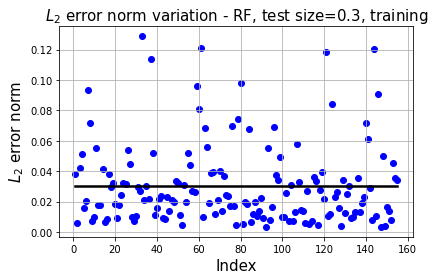

In [114]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - RF, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

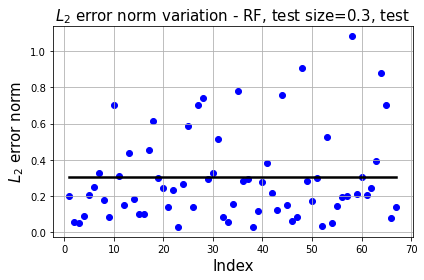

In [115]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - RF, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

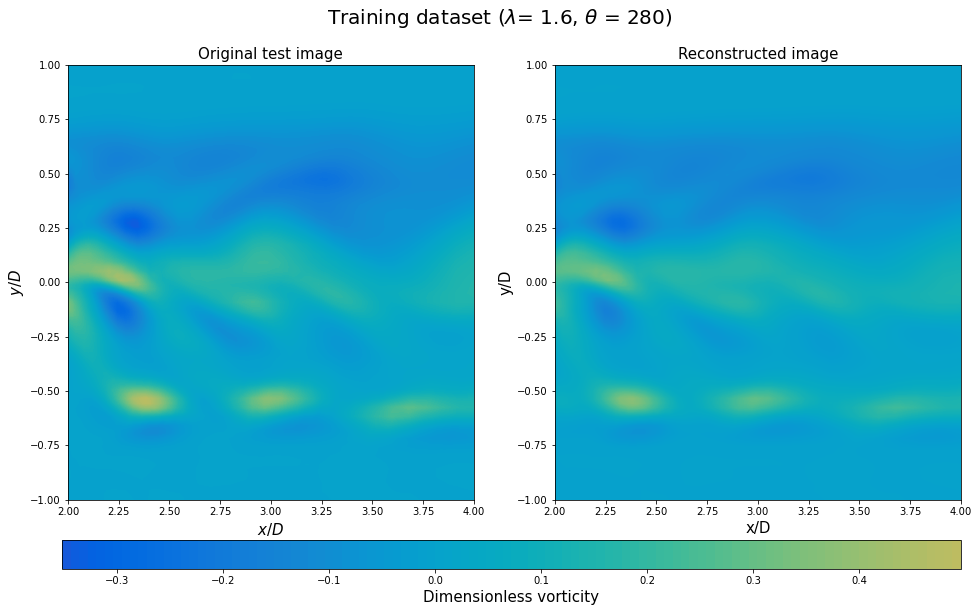

In [107]:
plt.figure(figsize=(16, 8))
y_train3_rotate = y_train[3].T.reshape(100, 100)
decoded_rotate = y_p_train[3].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_train3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Training dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_train[3], theta_train[3]),fontsize=20)
plt.show()

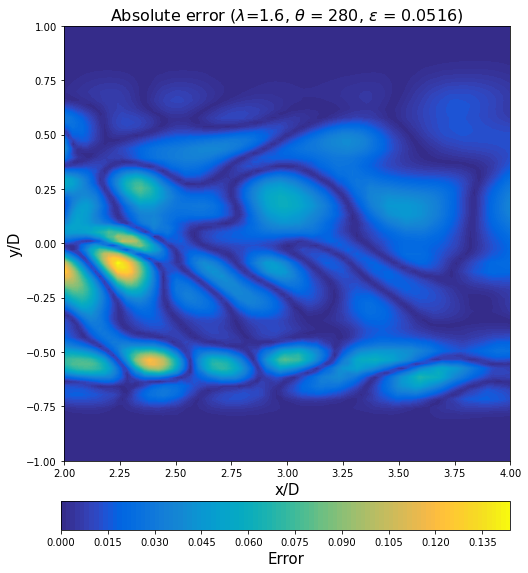

In [121]:
error_train_abs3_rotate = np.abs(y_p_train[3]-y_train[3]).T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate, levels=128, cmap=parula_map)
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_train[3], theta_train[3], l2_error_train_list[3]), fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

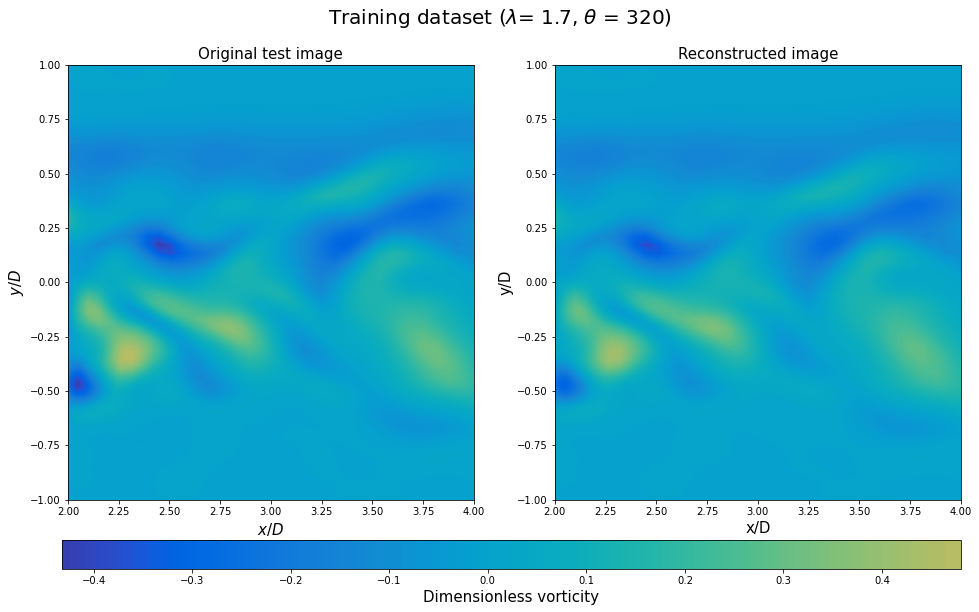

In [122]:
plt.figure(figsize=(16, 8))
y_train21_rotate = y_train[-5].T.reshape(100, 100)
decoded_rotate = y_p_train[-5].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_train21_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Training dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_train[-5], theta_train[-5]), fontsize=20)
plt.show()

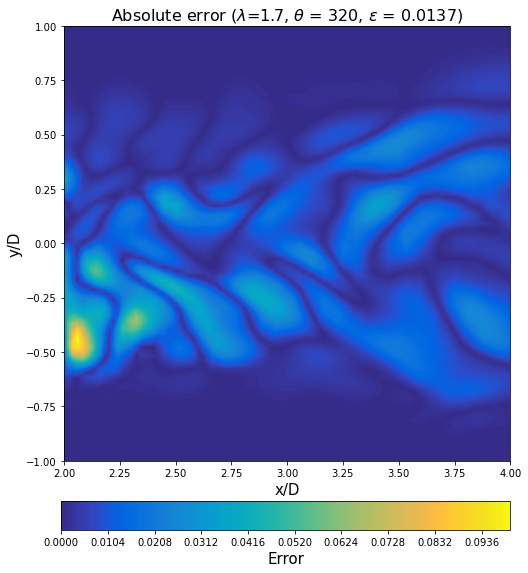

In [123]:
error_train_abs21_rotate = np.abs(y_p_train[-5]-y_train[-5]).T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs21_rotate, levels=128, cmap=parula_map)
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_train[-5],theta_train[-5], l2_error_train_list[-5]), fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

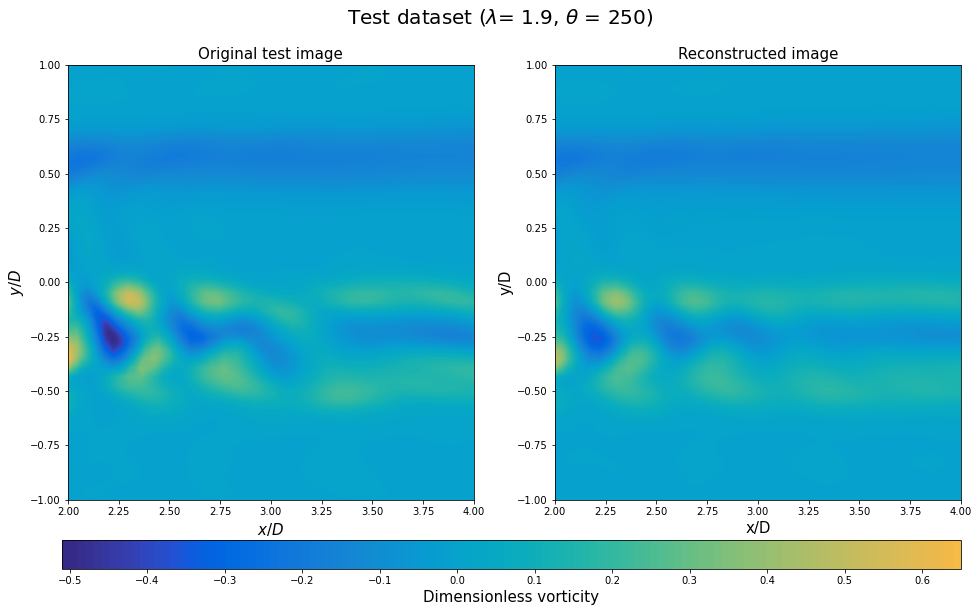

In [124]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = y_p_test[3].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

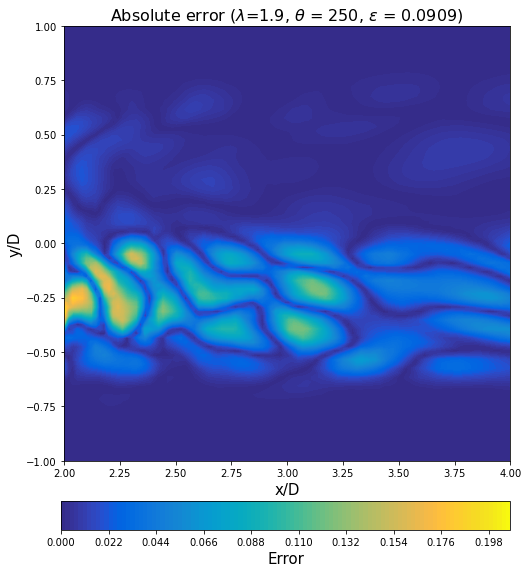

In [125]:
error_test_abs3_rotate = np.abs(y_p_test[3]-y_test[3]).T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap=parula_map)
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

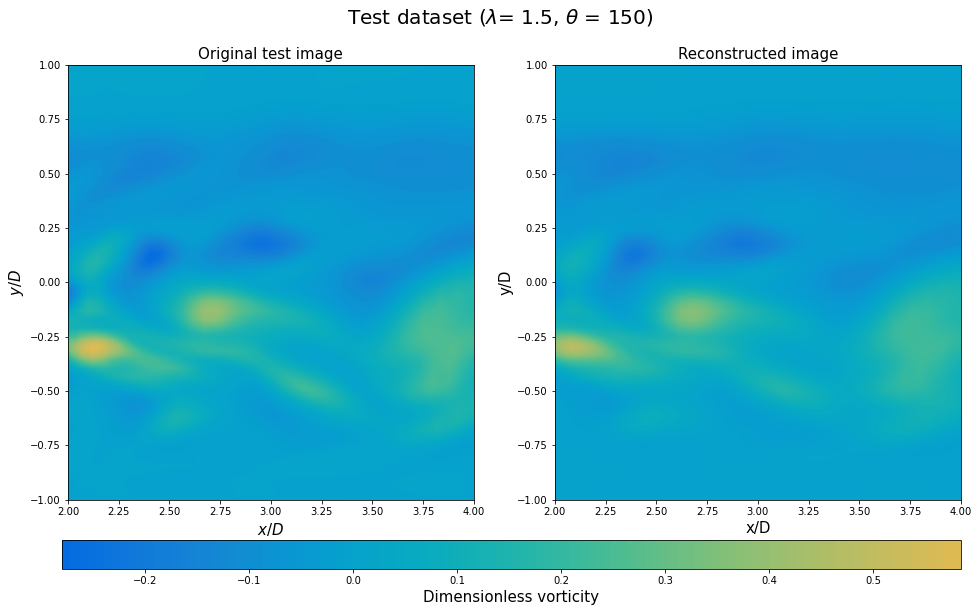

In [126]:
plt.figure(figsize=(16, 8))
y_test_rotate2 = y_test[2].T.reshape(100, 100)
decoded_rotate = y_p_test[2].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[2], theta_test[2]),fontsize=20)
plt.show()

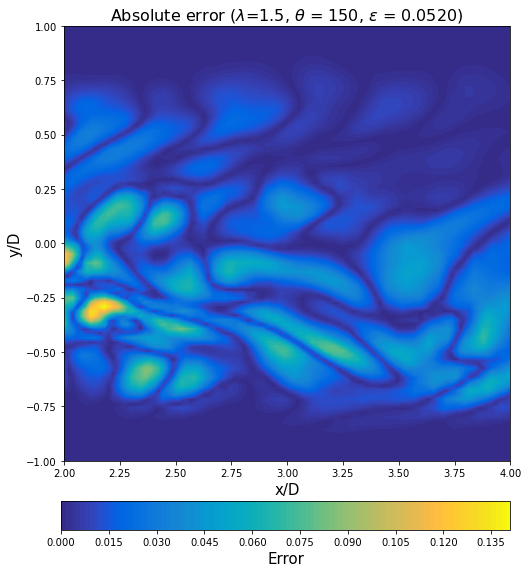

In [127]:
error_test_abs_rotate2 = np.abs(y_p_test[2]-y_test[2]).T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[2],theta_test[2], l2_error_test_list[2]), fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

In [128]:
vor_ytrain1_D200 = y_train[3].T[:, 0]
vor_ytrain1_D225 = y_train[3].T[:, 12]
vor_ytrain1_D250 = y_train[3].T[:, 24]
vor_ytrain2_D200 = y_train[-5].T[:, 0]
vor_ytrain2_D225 = y_train[-5].T[:, 12]
vor_ytrain2_D250 = y_train[-5].T[:, 24]
vor_ytest1_D200 = y_test[3].T[:, 0]
vor_ytest1_D225 = y_test[3].T[:, 12]
vor_ytest1_D250 = y_test[3].T[:, 24]
vor_ytest2_D200 = y_test[2].T[:, 0]
vor_ytest2_D225 = y_test[2].T[:, 12]
vor_ytest2_D250 = y_test[2].T[:, 24]

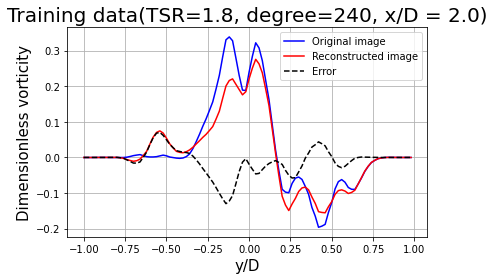

In [129]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain1_D200, 'b', np.arange(-1, 1, 0.02), y_p_train[3].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytrain1_D200.reshape(100,1)-y_p_train[3].T[:, 0].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Training data(TSR=1.8, degree=240, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

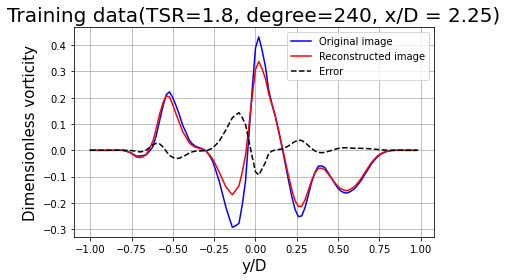

In [130]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain1_D225, 'b', np.arange(-1, 1, 0.02), y_p_train[3].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytrain1_D225.reshape(100,1)-y_p_train[3].T[:, 12].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Training data(TSR=1.8, degree=240, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

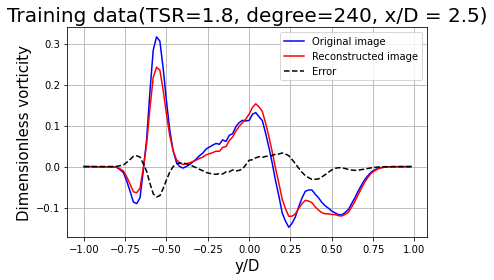

In [131]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain1_D250, 'b', np.arange(-1, 1, 0.02), y_p_train[3].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytrain1_D250.reshape(100,1)-y_p_train[3].T[:, 24].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Training data(TSR=1.8, degree=240, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

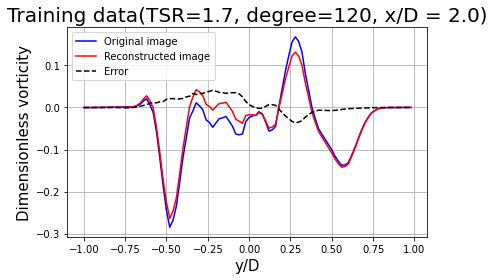

In [132]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain2_D200, 'b', np.arange(-1, 1, 0.02), y_p_train[-5].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytrain2_D200.reshape(100,1)-y_p_train[-5].T[:, 0].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Training data(TSR=1.7, degree=120, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper left')
plt.tight_layout()
plt.grid()
plt.show()

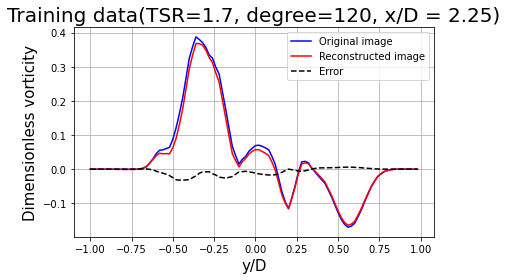

In [133]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain2_D225, 'b', np.arange(-1, 1, 0.02), y_p_train[-5].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytrain2_D225.reshape(100,1)-y_p_train[-5].T[:, 12].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Training data(TSR=1.7, degree=120, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

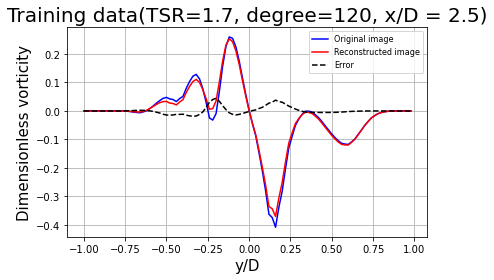

In [134]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain2_D250, 'b', np.arange(-1, 1, 0.02), y_p_train[-5].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytrain2_D250.reshape(100,1)-y_p_train[-5].T[:, 24].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Training data(TSR=1.7, degree=120, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right', fontsize=8)
plt.tight_layout()
plt.grid()
plt.show()

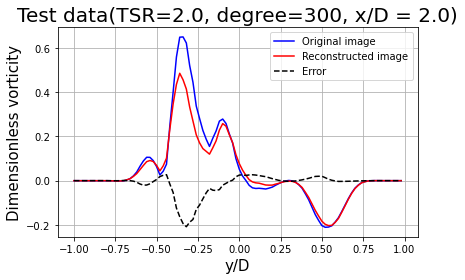

In [135]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest1_D200, 'b', np.arange(-1, 1, 0.02), y_p_test[3].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytest1_D200.reshape(100,1)-y_p_test[3].T[:, 0].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Test data(TSR=2.0, degree=300, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

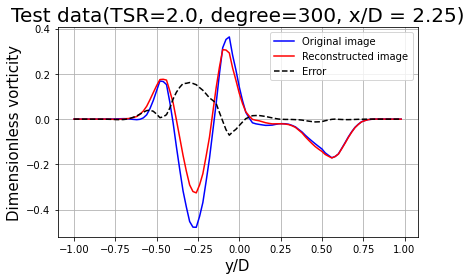

In [136]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest1_D225, 'b', np.arange(-1, 1, 0.02), y_p_test[3].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytest1_D225.reshape(100,1)-y_p_test[3].T[:, 12].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Test data(TSR=2.0, degree=300, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

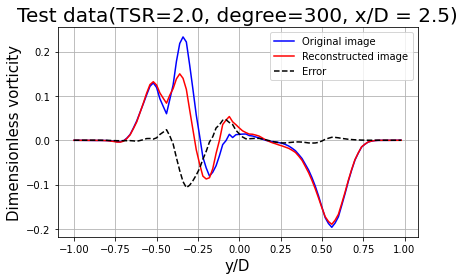

In [137]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest1_D250, 'b', np.arange(-1, 1, 0.02), y_p_test[3].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytest1_D250.reshape(100,1)-y_p_test[3].T[:, 24].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Test data(TSR=2.0, degree=300, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

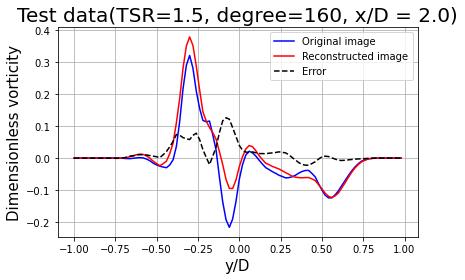

In [138]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D200, 'b', np.arange(-1, 1, 0.02), y_p_test[2].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytest2_D200.reshape(100,1)-y_p_test[2].T[:, 0].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Test data(TSR=1.5, degree=160, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

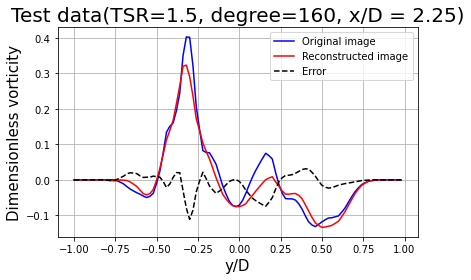

In [140]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D225, 'b', np.arange(-1, 1, 0.02), y_p_test[2].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytest2_D225.reshape(100,1)-y_p_test[2].T[:, 12].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Test data(TSR=1.5, degree=160, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

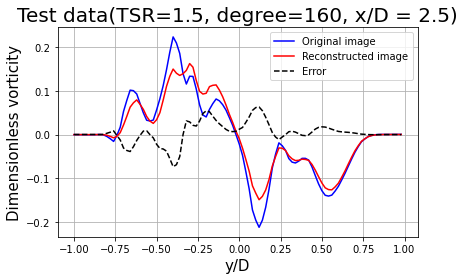

In [141]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D250, 'b', np.arange(-1, 1, 0.02), y_p_test[2].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytest2_D250.reshape(100,1)-y_p_test[2].T[:, 24].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Test data(TSR=1.5, degree=160, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()